In [1]:
import os
import sonia
from sonnia.sonia import Sonia
from sonnia.sonia_paired import SoniaPaired
from sonia.plotting import Plotter
from sonnia.processing import Processing
import sonia
import numpy as np
import pandas as pd

# define and infer model

In [2]:
data_seqs=np.loadtxt('data_seqs_paired.txt',dtype=str)
qm = SoniaPaired(data_seqs=data_seqs)

2023-01-10 11:47:44.147791: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-10 11:47:44.147884: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2
Encode data.


100%|██████████████████████████████████████| 100000/100000 [00:03<00:00, 28848.69it/s]


In [3]:
# add generated sequences (you can add them from file too, more is better.)
qm.add_generated_seqs(int(2e5)) 

100%|██████████████████████████████████████| 200000/200000 [00:07<00:00, 26374.92it/s]


Encode gen.


100%|██████████████████████████████████████| 200000/200000 [00:07<00:00, 26935.95it/s]
2023-01-10 11:48:10.363648: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-10 11:48:10.404597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [4]:
#define and train model
qm.infer_selection(epochs=30,batch_size=int(1e4))

2023-01-10 11:48:19.716064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-10 11:48:20.819064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


# Do some plotting

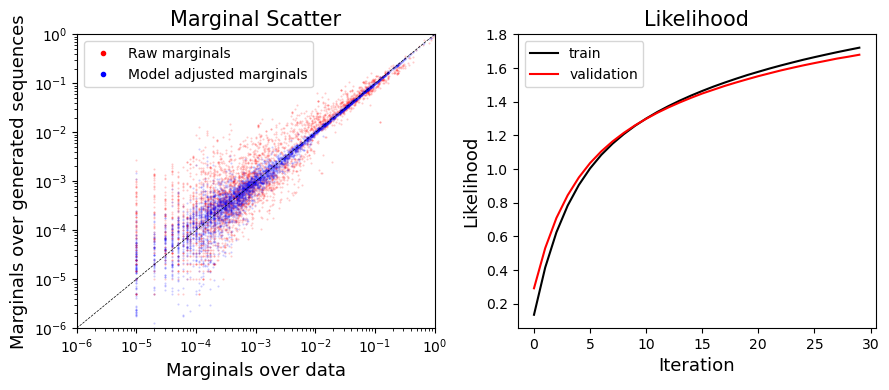

In [5]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

# Generate sequences

In [6]:
pre_seqs=qm.generate_sequences_pre(int(1e4),nucleotide=False)
pre_seqs[:3]

100%|████████████████████████████████████████| 10000/10000 [00:00<00:00, 25987.58it/s]


array([['CASSLRGTNTGELFF', 'TRBV11-3', 'TRBJ2-2', 'CAETLSHARLMF',
        'TRAV13-2', 'TRAJ31'],
       ['CAISVPGGVSGELFF', 'TRBV10-3', 'TRBJ2-2', 'CAAIYNQGGKLIF',
        'TRAV13-2', 'TRAJ23'],
       ['CASSPLIDMNTEAFF', 'TRBV6-5', 'TRBJ1-1', 'CAASTDAGGTSYGKLTF',
        'TRAV13-1', 'TRAJ52']], dtype='<U84')

In [7]:
post_seqs=qm.generate_sequences_post(int(1e4),nucleotide=False)
post_seqs[:5]

100%|██████████████████████████████████████| 110000/110000 [00:04<00:00, 26438.63it/s]
2023-01-10 11:49:08.815343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([['CASTERGAGNTGELFF', 'TRBV10-1', 'TRBJ2-2', 'CAMREGTYGNNRLAF',
        'TRAV14/DV4', 'TRAJ7'],
       ['CASSLCPGQGNYGYTF', 'TRBV28', 'TRBJ1-2', 'CAARAGTALIF',
        'TRAV13-2', 'TRAJ15'],
       ['CASSLALATGQGF', 'TRBV7-9', 'TRBJ2-5', 'CAAADSWGKLQF',
        'TRAV13-1', 'TRAJ24'],
       ['CASSFLTTYGYTF', 'TRBV28', 'TRBJ1-2', 'CALSNQGGKLIF', 'TRAV9-2',
        'TRAJ23'],
       ['CASSSEGLNTEAFF', 'TRBV7-7', 'TRBJ1-1', 'CAGLSGGYNKLIF',
        'TRAV25', 'TRAJ4']], dtype='<U90')

# Evaluate sequences

In [8]:
Q_data,pgen_data,ppost_data=qm.evaluate_seqs(qm.data_seqs[:int(1e4)])
Q_gen,pgen_gen,ppost_gen=qm.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=qm.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

[3.7903247 0.9790641 6.1984196]
[1.29793282e-17 3.37088659e-15 5.32983994e-19]
[4.91958679e-17 3.30031407e-15 3.30365842e-18]


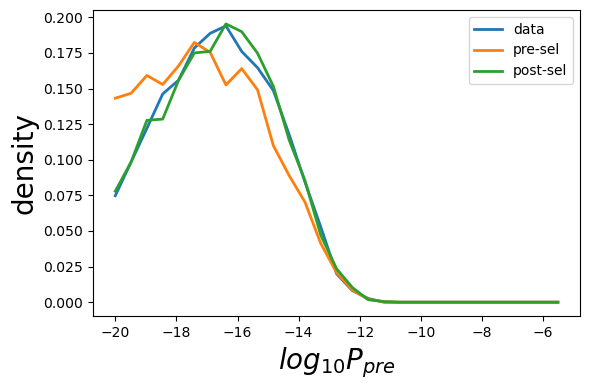

In [9]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}')

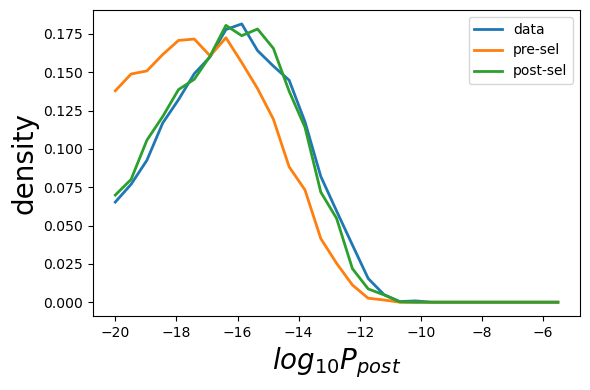

In [10]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}')

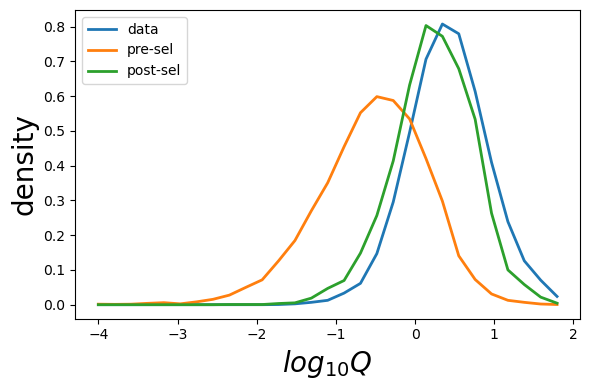

In [11]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2)

# some utils inherited from OLGA

In [12]:
# olga functionality can be directly accessed through the main SoNNia model

In [13]:
qm.seqgen_model_light.gen_rnd_prod_CDR3(),qm.seqgen_model_heavy.gen_rnd_prod_CDR3()

(('TGTGCTCTGAGTGAGGCGACACACAGCAGTGCTTCCAAGATAATCTTT',
  'CALSEATHSSASKIIF',
  25,
  26),
 ('TGCAGTGCTCCCCGGGGGGGCGAGGGGGAAAGTAGCAATGAGCAGTTCTTC',
  'CSAPRGGEGESSNEQFF',
  29,
  7))

In [14]:
qm.genomic_data_light.genJ[1],qm.genomic_data_heavy.genJ[1]

(['TRAJ10*01',
  'ATACTCACGGGAGGAGGAAACAAACTCACCTTT',
  'ATACTCACGGGAGGAGGAAACAAACTCACCTTTGGGACAGGCACTCAGCTAAAAGTGGAACTCA'],
 ['TRBJ1-2*01',
  'CTAACTATGGCTACACCTTC',
  'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG'])

In [15]:
qm.pgen_model_heavy.PinsDJ,qm.pgen_model_light.PinsVJ

(array([6.17437e-02, 3.61889e-02, 9.09608e-02, 1.05828e-01, 1.37586e-01,
        1.14643e-01, 9.60481e-02, 8.14864e-02, 6.38634e-02, 4.92164e-02,
        3.93751e-02, 2.90524e-02, 2.30059e-02, 1.64381e-02, 1.45157e-02,
        1.13759e-02, 5.79127e-03, 5.97164e-03, 3.92779e-03, 2.96191e-03,
        2.04381e-03, 2.48417e-03, 9.09996e-04, 1.35102e-03, 2.44798e-04,
        4.52171e-04, 9.17052e-04, 6.28282e-04, 0.00000e+00, 1.41295e-05,
        9.74155e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([1.89291e-02, 3.03541e-02, 6.52999e-02, 1.04646e-01, 1.40618e-01,
        1.13308e-01, 9.98114e-02, 8.96481e-02, 7.13409e-02, 6.43090e-02,
        5.32052e-02, 4.34381e-02, 3.11781e-02, 2.36366e-02, 1.68362e-02,
        1.31584e-02, 6.66173e-03, 4.21697e-03, 3.73988e-03, 1.88316e-03,
        1.42450e-03, 1.04438e-03, 4.52429e-04, 2.27138e-04, 2.02455e-04,
        6.64942e-05, 1.61981e-04, 5.16505e-05, 3.24858e-05, 6.67986e-05,
        0.00000e+00, 2.15535e-05, 2.90884e-05, 0.

# Save and Load Model

In [17]:
qm.save_model('test_paired')

In [18]:
qm_new=SoniaPaired(load_dir='test_paired')

In [19]:
# By default sequences are not added. Adding them now.
qm_new.update_model(add_data_seqs=qm.data_seqs,add_gen_seqs=qm.gen_seqs)

Encode data.


100%|██████████████████████████████████████| 100000/100000 [00:03<00:00, 28984.96it/s]


Encode gen.


100%|██████████████████████████████████████| 200000/200000 [00:08<00:00, 23372.29it/s]
2023-01-10 12:16:38.770081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [20]:
# Continue inference
qm_new.infer_selection(epochs=5)
qm_new.learning_history.history

2023-01-10 12:16:47.788009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-10 12:16:49.836568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


{'loss': [0.5980419516563416,
  0.5371102690696716,
  0.5071564316749573,
  0.48844748735427856,
  0.4752016067504883],
 '_likelihood': [-0.18734541535377502,
  -0.47724300622940063,
  -0.6413761377334595,
  -0.748820424079895,
  -0.8252360820770264],
 'binary_crossentropy': [0.5980420708656311,
  0.5371100902557373,
  0.5071563124656677,
  0.48844751715660095,
  0.47520148754119873],
 'val_loss': [0.5608506798744202,
  0.5226473808288574,
  0.5006017684936523,
  0.48596706986427307,
  0.4750104546546936],
 'val__likelihood': [-0.35845333337783813,
  -0.559040904045105,
  -0.6826979517936707,
  -0.7673916220664978,
  -0.8296674489974976],
 'val_binary_crossentropy': [0.5608506202697754,
  0.5226474404335022,
  0.5006017088890076,
  0.4859670400619507,
  0.4750104546546936]}

# Compute Diversity and Distance from Reference Distribution

In [21]:
print('model entropy is: ', qm_new.entropy(), '[bits]')

1 sequences have zero Pgen, we remove them in the evaluation of the entropy
model entropy is:  55.450773500677506 [bits]


In [22]:
print('Dkl post gen is: ', qm_new.dkl_post_gen(), '[bits]')

Dkl post gen is:  0.73267365 [bits]
